Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [3]:
import os
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Intialize Dataset path & Path to store hdf5 dataset

In [4]:
dataset_path = "/content/drive/MyDrive/TPR Project/TPR PROJECT DATA All"
output_path = "/content/drive/MyDrive/TPR Project/dataset.hdf5"

Function to create hdf5 dataset

In [7]:
def create_hdf5(dataset_path, output_path):
    parts = os.listdir(dataset_path)
    images = []
    labels = []
    with h5py.File(output_path, 'w') as hdf:
        for part in parts:
            part_path = os.path.join(dataset_path, part)
            for image_name in os.listdir(part_path):
                image_path = os.path.join(part_path, image_name)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (128, 128))
                images.append(image)
                labels.append(part)
        hdf.create_dataset('images', data=np.array(images))
        hdf.create_dataset('labels', data=np.array(labels, dtype='S'))

In [8]:
create_hdf5(dataset_path, output_path)

In [9]:
# Load the data from the HDF5 file
file = h5py.File(output_path , "r")

In [10]:
# defines dataset_names that contain the names of all the datasets stored in the HDF5 file
dataset_names = list(file.keys())

In [11]:
# print datasets name in HDF5 file
print("Dataset names:")
for name in dataset_names:
    print(name)

Dataset names:
images
labels


In [12]:
type(file['images'])

h5py._hl.dataset.Dataset

In [13]:
# Accessing the dataset
for dataset_name in dataset_names:
    dataset = file[dataset_name]
    print("Dataset:", dataset_name)
    print("Shape of the dataset:", dataset.shape)

Dataset: images
Shape of the dataset: (335, 128, 128, 3)
Dataset: labels
Shape of the dataset: (335,)


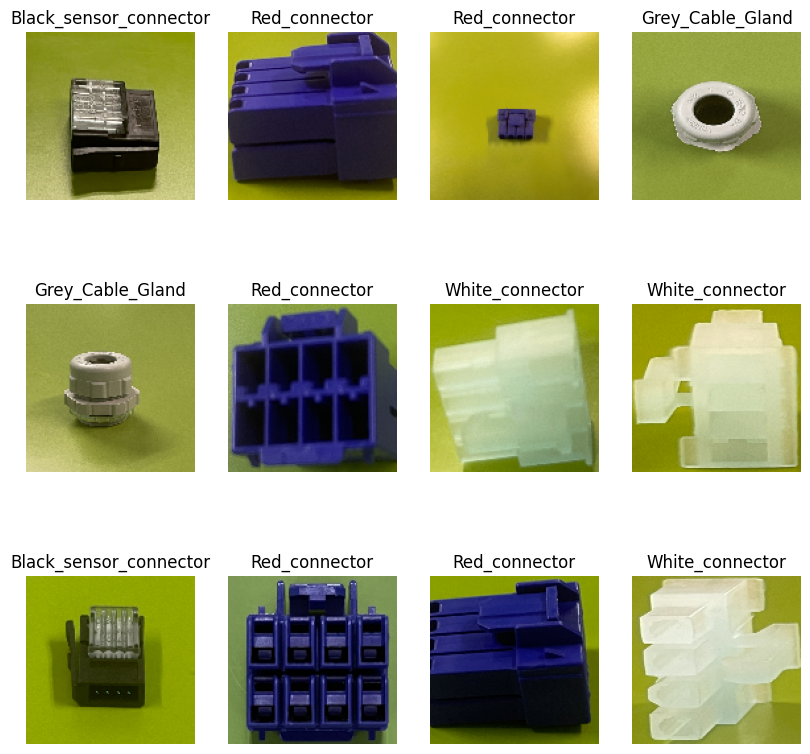

In [14]:
# Finding images and their labels from the datasets
images = file["images"]
labels = file["labels"]

# Ploting from random indices
random_indices = np.random.randint(0, len(images), size=12)


fig, axs = plt.subplots(3, 4, figsize=(10, 10))
for i, index in enumerate(random_indices):
    ax = axs[i // 4, i % 4]
    ax.imshow(images[index])
    ax.set_title(labels[index].decode())
    ax.axis("off")

plt.show()